## Reading and Understanding the data


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing necessary libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# #Reading the day csv file
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the number of rows and columns in the dataframe 
df.shape

(730, 16)

In [5]:
# Checking information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Check the summary for the numeric columns in the Dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# checking for null values 

df.isnull().sum() 
# No null values found 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Droping the variables that are not of use
# we can drop "instant" column as it is an index 
# we can drop "dteday" as "dteday", "yr" and 'mnth' are having same data 
# droping casual and registered column as we know casual+registered=cnt and cnt is our target variable so we will not consider-
# casual and registered.

df.drop(['instant','dteday','casual','registered'],axis=1, inplace = True)

In [9]:
# Check the head of the dataset
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# Checking information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [11]:
# Changing the categorical variables to their appropriate values

# season

df.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [12]:
df['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace = True )

In [13]:
# weekday

df.weekday.unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [14]:
df['weekday'].replace({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',0:'Sunday'}, inplace = True)

In [15]:
# weathersit

df.weathersit.unique()

array([2, 1, 3], dtype=int64)

In [16]:
df['weathersit'].replace({1:"Clear",2:'Mist and Cloudy',3:'Light Rain and Snow',4:"Heavy Rain and Ice Pallets"}, inplace = True)

In [17]:
# mnth

df['mnth'].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'},inplace=True)

In [18]:
# Check the head of the dataset
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
# Checking information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Data Visualisation

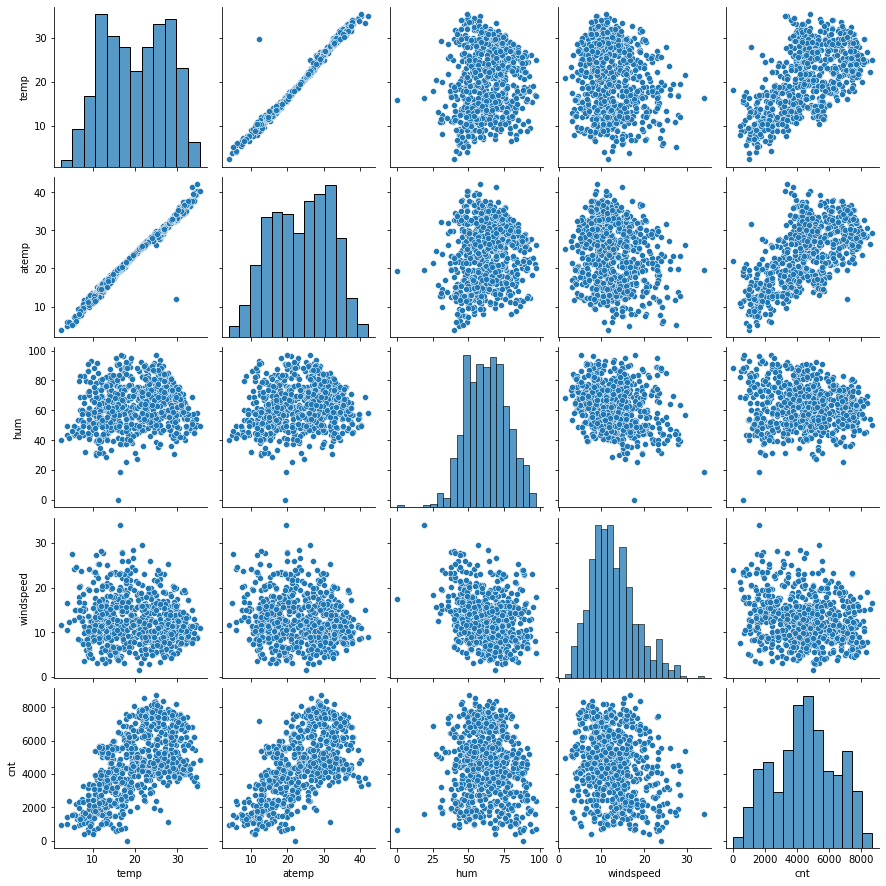

In [20]:
# Performing EDA

# Pairplots for numberic variables

sns.pairplot(df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

<AxesSubplot:>

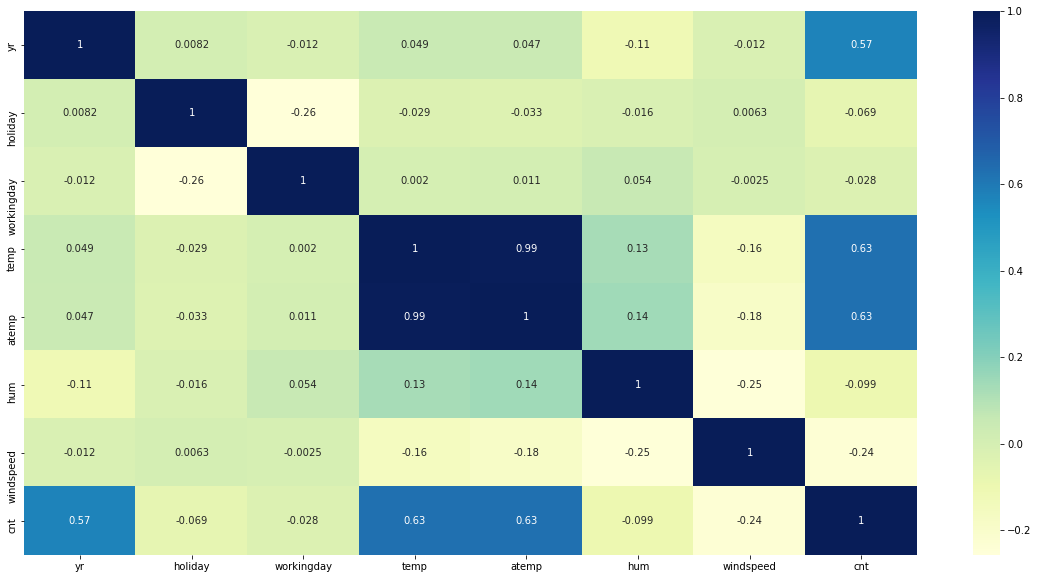

In [21]:
# From the above pair plot there seem to be a very high correlation between the variable 'temp' and 'atemp'

# Checking for correlation between variables 

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [22]:
# As we can clearly infer from the above heatmap that there is indeed high correlation of 0.99 between temp and atemp 

# Therefore droping temp 

df.drop(['temp'], inplace=True, axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Mist and Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Mist and Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear,11.46350,43.6957,12.522300,1600


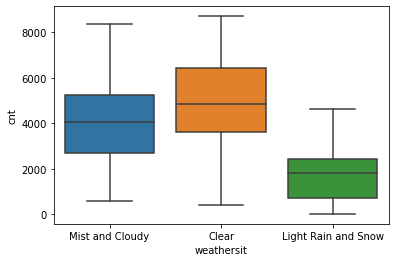

In [23]:
# Plotting different variables to gain insite

# weathersit

sns.boxplot(x='weathersit',y='cnt',data=df)
plt.show()

From above boxplot we can infer that:
- When the weather is clear the count for total bike users increases.
- And when there's Light rain and snow the count for bike users decreses which is pretty intuitive as well.

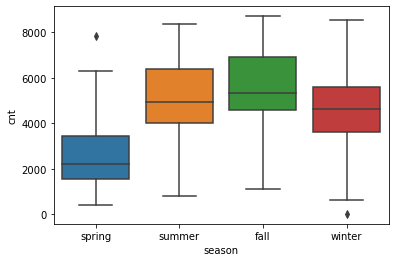

In [24]:
# season

sns.boxplot(x='season',y='cnt',data=df)
plt.show()

From above boxplot we can infer that:

- Fall season is best season in terms of business as count for bike users is the highest in fall.
- Spring season on the other hand has the lowest count for bike users

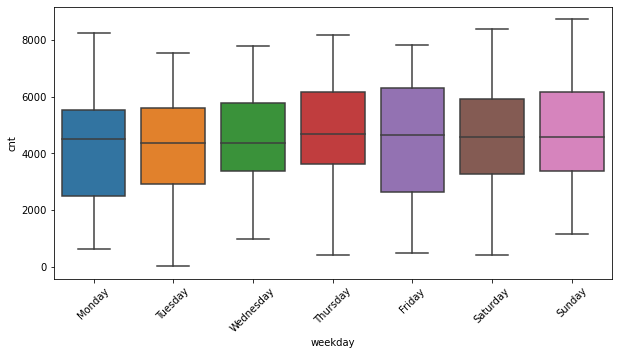

In [25]:
# weekday

plt.figure(figsize=(10,5))
sns.boxplot(x='weekday',y='cnt',data=df)
plt.xticks(rotation=45)
plt.show()

From above boxplot we can infer that:

- Sunday has the highest number of count for bike users.

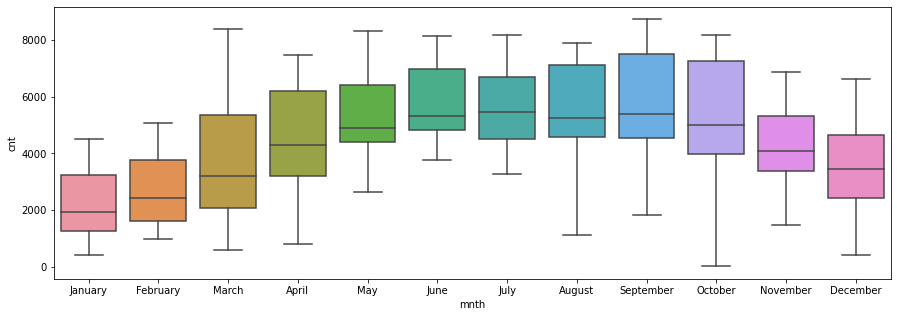

In [26]:
# mnth

plt.figure(figsize=(15,5))
sns.boxplot(x='mnth',y='cnt',data=df)
plt.show()

From above boxplot we can infer that:

- Month of September has the highest bike user count (It makes sense as the fall season has the highest bike user count as well)

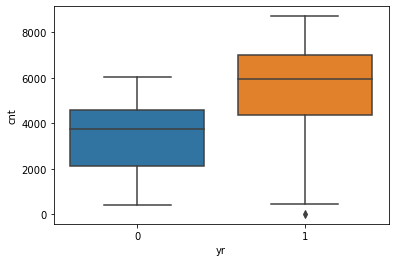

In [27]:
# yr

sns.boxplot(x='yr',y='cnt',data=df)
plt.show()

From above boxplot we can infer that:
- year 1(2019) has more count for bike user.

## Data Preparation

In [28]:
# Creating dummy vairables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [29]:
# Creating dummy variables for categorical data
# Let's drop the first column using 'drop_first = True'
Season=pd.get_dummies(df['season'],drop_first=True)
Month=pd.get_dummies(df['mnth'],drop_first=True)
WeekDay=pd.get_dummies(df['weekday'],drop_first=True)
Weather=pd.get_dummies(df['weathersit'],drop_first=True)

In [30]:
# Add the results to the original dataframe
df=pd.concat([df,Season],axis=1)
df=pd.concat([df,Month],axis=1)
df=pd.concat([df,WeekDay],axis=1)
df=pd.concat([df,Weather],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               730 non-null    object 
 1   yr                   730 non-null    int64  
 2   mnth                 730 non-null    object 
 3   holiday              730 non-null    int64  
 4   weekday              730 non-null    object 
 5   workingday           730 non-null    int64  
 6   weathersit           730 non-null    object 
 7   atemp                730 non-null    float64
 8   hum                  730 non-null    float64
 9   windspeed            730 non-null    float64
 10  cnt                  730 non-null    int64  
 11  spring               730 non-null    uint8  
 12  summer               730 non-null    uint8  
 13  winter               730 non-null    uint8  
 14  August               730 non-null    uint8  
 15  December             730 non-null    uin

In [31]:
# droping the original columns

df.drop('season',axis=1,inplace=True)
df.drop('mnth',axis=1,inplace=True)
df.drop('weekday', axis=1,inplace=True)
df.drop('weathersit', axis=1,inplace=True)
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain and Snow,Mist and Cloudy
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Dividing the data into training and testing Sets

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)


In [33]:
# Scaling the numerical data 
# MinMax Scaling brings the data in the range of 0-1(This method of Scaling also handles the Outliers)

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

In [34]:
# Apply scaler() to all continuous columns
num_vars=['atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars]) 

In [35]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain and Snow,Mist and Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [36]:
# describing the 
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain and Snow,Mist and Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
# Creating X and y 

y_train = df_train.pop('cnt')
X_train = df_train

In [38]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [39]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,August,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain and Snow,Mist and Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


## Data Modelling and Evaluation

In [40]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
# Using Mix approach for Building Linear Regression Model
# Using RFE for Top 13 Feature Selection

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)  # running RFE
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 7),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', True, 1),
 ('December', False, 2),
 ('February', True, 1),
 ('January', True, 1),
 ('July', False, 12),
 ('June', False, 9),
 ('March', False, 16),
 ('May', False, 8),
 ('November', False, 3),
 ('October', False, 14),
 ('September', True, 1),
 ('Monday', False, 11),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Thursday', False, 15),
 ('Tuesday', False, 10),
 ('Wednesday', False, 13),
 ('Light Rain and Snow', True, 1),
 ('Mist and Cloudy', True, 1)]

In [43]:
# These columns are selected by RFE

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'summer', 'winter',
       'August', 'February', 'January', 'September', 'Light Rain and Snow',
       'Mist and Cloudy'],
      dtype='object')

In [44]:
# RFE does not support these columns

X_train.columns[~rfe.support_]

Index(['workingday', 'spring', 'December', 'July', 'June', 'March', 'May',
       'November', 'October', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')

In [45]:
# Building model using statsmodel, for the detailed statistics

# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [46]:
# Adding a constant variable 

import statsmodels.api as sm
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [47]:
# Running the linear model

lm = sm.OLS(y_train,X_train_rfe1).fit()

In [48]:
# summary of our linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.5
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          5.80e-187
Time:                        08:34:11   Log-Likelihood:                 503.88
No. Observations:                 510   AIC:                            -979.8
Df Residuals:                     496   BIC:                            -920.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2648    

`February` is insignificant in presence of other variables as P-value for `February` > 0.05 therefore droping it 

In [49]:
# Droping February 

X_train_rfe = X_train_rfe.drop(['February'], axis=1)

In [50]:
# Rebuilding the model without February

# adding constant variable 

import statsmodels.api as sm
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [51]:
# Running the linear model

lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [52]:
# summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.18e-187
Time:                        08:34:12   Log-Likelihood:                 502.73
No. Observations:                 510   AIC:                            -979.5
Df Residuals:                     497   BIC:                            -924.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2496    

P-value of every feature is less that 0.05 therefore every feature looks significant, With R-squared = 0.838 and Adj. R-squared = 0.834

In [53]:
# Now calculating VIFs for the model

# Importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,18.54
2,atemp,11.46
4,windspeed,3.60
11,Mist and Cloudy,2.15
0,yr,2.04
6,winter,2.03
5,summer,1.96
7,August,1.56
8,January,1.54
9,September,1.31


In [54]:
# column hum has a very high Vif therefore Droping it 

X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [55]:
# Rebuilding the model without hum

# adding constant variable 

X_train_rfe1 = sm.add_constant(X_train_rfe)

In [56]:
# Running the linear model

lm2 = sm.OLS(y_train,X_train_rfe1).fit()

In [57]:
# summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.1
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.91e-184
Time:                        08:34:13   Log-Likelihood:                 492.31
No. Observations:                 510   AIC:                            -960.6
Df Residuals:                     498   BIC:                            -909.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1550    

In [58]:
# Now calculating VIFs for the model

vif = pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,atemp,4.95
3,windspeed,3.27
0,yr,2.04
4,summer,1.90
5,winter,1.57
6,August,1.56
10,Mist and Cloudy,1.54
8,September,1.31
7,January,1.22
9,Light Rain and Snow,1.08


VIF for all the columns is than 5 therefore they are within the acceptable limit

In [59]:
# Now randomly Droping January column in order to reduce the complexity of the model by decreasing the number of irrelevant variable

X_train_rfe = X_train_rfe.drop(['January'], axis=1)

In [60]:
# Rebuilding the model without hum

# adding constant variable 

X_train_rfe1 = sm.add_constant(X_train_rfe)

In [61]:
# Running the linear model

lm3 = sm.OLS(y_train,X_train_rfe1).fit()

In [62]:
# summary of our linear model
print(lm3.summary()) # Final model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.0
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          3.10e-184
Time:                        08:34:14   Log-Likelihood:                 488.96
No. Observations:                 510   AIC:                            -955.9
Df Residuals:                     499   BIC:                            -909.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1280    

After droping `January` column we can see that there's only a minimal drop in the Adj. R-squared. Thus we can conclude that droping `January` was a right choice. 

## Residual Analysis of the train data

now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [63]:
y_train_cnt = lm3.predict(X_train_rfe1)

In [64]:
# Importing necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
# calculating residuals

res = y_train - y_train_cnt

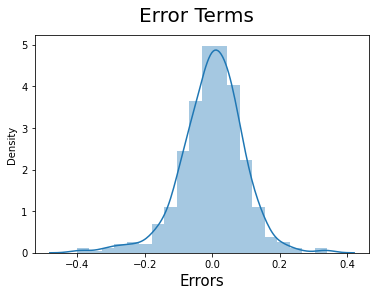

In [66]:
# Checking the assumption of normality
# ploting the histogram of the error terms 

fig = plt.figure()
sns.distplot((res), bins=20)
fig.suptitle('Error Terms',fontsize = 20)
plt.xlabel("Errors", fontsize = 15)
plt.show()

As we can clearly see for the above graph that error terms are normaly distributed

In [67]:
# Multiple regression assumes that the independent variables are not highly correlated with each other.
# checking for correlation between the variables 

vif = pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,atemp,4.91
3,windspeed,3.05
0,yr,2.00
4,summer,1.82
6,August,1.55
5,winter,1.50
9,Mist and Cloudy,1.49
7,September,1.30
8,Light Rain and Snow,1.08
1,holiday,1.04


From the VIF calculation we can say that there is no presence of Multicollinearity between the predictor variables as VIF is within the acceptable range for all variables i.e. below 5

In [68]:
# Now for test data 
#Scaling the test data

num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars]) 

In [69]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain and Snow,Mist and Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
# Creating X and y sets

y_test = df_test.pop('cnt')
X_test = df_test

In [71]:
X_train_new = X_train_rfe1.drop(['const'], axis = 1) # droping const column from X_train_rfe1

In [72]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_sm = sm.add_constant(X_test_new)

In [73]:
X_test_sm.columns # checking columns

Index(['const', 'yr', 'holiday', 'atemp', 'windspeed', 'summer', 'winter',
       'August', 'September', 'Light Rain and Snow', 'Mist and Cloudy'],
      dtype='object')

In [74]:
# Making Predictions on the chosen model

y_pred = lm3.predict(X_test_sm)

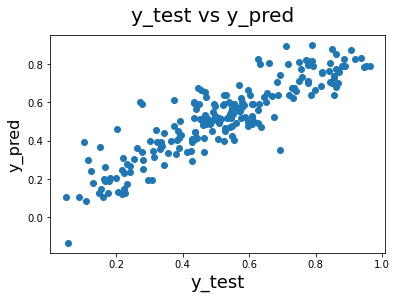

In [75]:
#CHECKING PREDICTED V/s TEST DATA

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) # Y-label
plt.show()

We have a model that seems good enough to predict demand of bikes. As the actual and the predicted cnt significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

In [76]:
# Calculating the r square for the test data

from sklearn.metrics import r2_score  # importing the r2_score from sklearn.metrics

r_squared = r2_score(y_test,y_pred)
r_squared

0.7937923992707865

In [77]:
X_test_new.shape

(219, 10)

In [78]:
# n is number of rows in X
n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

In [79]:
# Now calculating Adjusted R-Square for the test data
# using Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)

Adj_r2 = 1-(1-r_squared)*(n-1)/(n-p-1)
Adj_r2

0.7838785723126512

### Final Result Comparison

- Train R^2 :0.829
- Train Adjusted R^2 :0.826
- Test R^2 :0.794
- Test Adjusted R^2 :0.784

This seems to be a really good model that can very well 'Generalize' various datasets.
As the difference between `Train Adjusted R^2` and `Test Adjusted R^2` is very less we can say that, what the model has learned on the training set, it is also able to generalize very well on the test set.

## Reporting the final model

In [80]:
# The final model

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.0
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          3.10e-184
Time:                        08:34:17   Log-Likelihood:                 488.96
No. Observations:                 510   AIC:                            -955.9
Df Residuals:                     499   BIC:                            -909.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1280    

We can see that the equation of our best fitted line is:

$ cnt =  0.2334 \times  yr -0.0939  \times  holiday + 0.5370 \times atemp -0.1320 \times windspeed + 0.0978 \times summer + 0.1324 \times winter + 0.0680 \times August + 0.1207 \times September -0.2770 \times Light Rain and Snow -0.0836 \times Mist and Cloudy $

From our final model we can clearly see that the demand for Bikes mainly depends on below variables:

- yr
- holiday
- atemp
- windspeed
- summer
- winter
- August
- September
- Light Rain and Snow
- Mist and Cloudy

As per our final Model, the top 3 predictor variables that influences the bike booking are:
- `atemp`(feeling temperature in Celsius)-A coefficient value of '0.5370' indicates that a unit increase in `atemp` variable increases the bike hire numbers by 
  '0.5370' units.
  
- `Light Rain and Snow`-A coefficient value of '-0.2770' indicates that a unit increase in `Light Rain and Snow` variable decreases the bike hire numbers by '0.2770' units
- `yr`(Year)- A coefficient value of '0.2334' indicates that a unit increase in `yr` variable increases the bike hire numbers by 
  '0.2334' units.